## Hardcoding a highlight

You are working with the city of Houston to look at the relationship between sulfur dioxide (SO2) and nitrogen dioxide (NO2) pollution, specifically, pollution in the most recent year data was collected (2014). You have singled out a particularly bad day, November 26th, where there was a bad spike in the SO2 levels. To draw the viewers attention to this bad day, you will highlight it in a bright orangish-red and color the rest of the points gray.

`pandas`, `matplotlib.pyplot`, and `seaborn` are loaded as `pd`, `plt`, and `sns`, respectively.

_This course touches on a lot of concepts you may have forgotten, so if you ever need a quick refresher, download the [Seaborn Cheat Sheet](https://datacamp-community-prod.s3.amazonaws.com/f9f06e72-519a-4722-9912-b5de742dbac4) and keep it handy!_

Instructions

1. Modify the list comprehension to color the value corresponding to the 330th `day` (November 26th) of the `year` 2014 to `orangered` and the rest of the points to `lightgray`.
2. Pass the `houston_colors` array to `regplot()` using the `scatter_kws` argument to color the points.

In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import dataset
pollution = pd.read_csv('pollution_wide.csv')

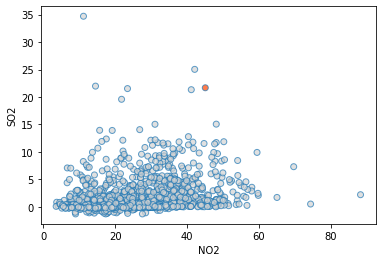

In [2]:
houston_pollution = pollution[pollution['city'] == 'Houston']

# Make array orangered for day 330 of year 2014, otherwise lightgray
houston_colors = ['orangered' if (day == 330) & (year == 2014) else 'lightgray' 
                  for day, year in zip(houston_pollution['day'], houston_pollution['year'])]

sns.regplot(x='NO2',
            y='SO2',
            data=houston_pollution,
            fit_reg=False, 
            # Send scatterplot argument to color points 
            scatter_kws={'facecolors': houston_colors, 'alpha': 0.7})
plt.show()

## Programmatically creating a highlight

You are continuing your work for the city of Houston. Now you want to look at the behavior of both NO<sub>2</sub> and SO<sub>2</sub> when the un-plotted ozone (O<sub>3</sub>) value was at its highest.

To do this, replace the logic in the current list comprehension with one that compares a row's `O3` value with the highest observed O<sub>3</sub> in the dataset. _Note: use `sns.scatterplot()` instead of `sns.regplot()`_. This is because `sns.scatterplot()` can take a non-color vector as its `hue` argument and colors the points automatically while providing a helpful legend.

Instructions

1. Find the value corresponding to the highest observed `O3` value in the `houston_pollution` DataFrame. Make sure to type the _letter_ `O` and **not** the _number_ zero!
2. Append the column `'point_type'` to the `houston_pollution` DataFrame to mark if the row contains the highest observed O<sub>3</sub>.
3. Pass this newly created column to the `hue` argument of `sns.scatterplot()` to color the points.

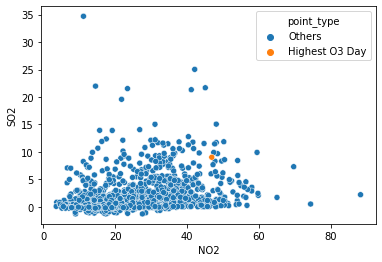

In [3]:
houston_pollution = pollution[pollution['city'] == 'Houston'].copy()

# Find the highest observed O3 value
max_O3 = houston_pollution['O3'].max()

# Make a column that denotes which day had highest O3
houston_pollution['point_type'] = ['Highest O3 Day' if O3 == max_O3 else 'Others' for O3 in houston_pollution['O3']]

# Encode the hue of the points with the O3 generated column
sns.scatterplot(x='NO2',
                y='SO2',
                hue='point_type',
                data=houston_pollution)
plt.show()

## Comparing with two KDEs

Imagine that you work for the _premier_ air-filter provider. Your company has asked you to build a report that looks into why 2012 was a particularly good year for sales of your ozone (O<sub>3</sub>) filter. You downloaded some helpful pollution data from the USGS, and you want to make a concise visualization that compares the general pattern of O3 pollution for 2012 to all other years on record.

To do this, you can build two overlaid kernel density estimation plots (KDEs): one for `2012` O<sub>3</sub> data and one for all other years.

Instructions

1. Filter the data in the first `sns.kdeplot()` call to include _only_ the year `2012`.
2. Shade under the first KDE with the `shade` argument.
3. Add the label `'2012'` for the plot legend.
4. Repeat the first three steps for second `sns.kdeplot()` call, but filter the data to _not_ include `2012`. Use the label `'other years'`.

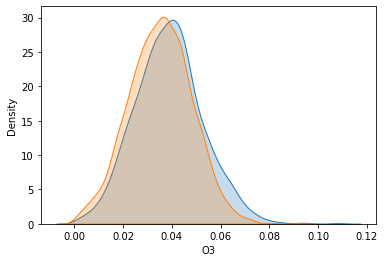

In [4]:
# Filter dataset to the year 2012
sns.kdeplot(pollution[pollution['year'] == 2012]['O3'], 
            # Shade under kde and add a helpful label
            shade = True,
            label = '2012')

# Filter dataset to everything except the year 2012
sns.kdeplot(pollution[pollution['year'] != 2012]['O3'], 
            # Again, shade under kde and add a helpful label           
            shade = True,
            label = 'other years')
plt.show()

## Improving your KDEs

One way of enhancing KDEs is with the addition of a `rug plot`. Rug plots are little dashes drawn beneath the density that show precisely where each data point falls. Adding a rug plot is particularly useful when you don't have a ton of data.

With small amounts of data you often have gaps along your support with no data, and it can be hard to tell whether a non-zero KDE line means data was present or is due to a wide kernel. A rug plot helps address this.

Let's return to the `sns.distplot()` function to draw two KDEs: one looking at the data for `Vandenberg Air Force Base` and the other looking at all the other cities in the pollution data. Since there is much less data contributing to the shape of the Vandenberg plot, add a rug plot beneath it.

Instructions

1. Turn off the histogram overlay for the first plot.
2. Make the Vandenberg plot `'steelblue'`.
3. Turn on rug plot functionality in the Vandenberg plot.
4. Remove histogram from the non-Vandenberg plot and set its color to `'gray'`.

/home/victor/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/victor/.local/lib/python3.8/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/victor/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


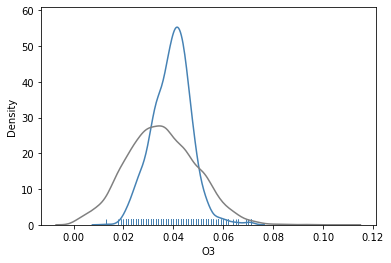

In [5]:
sns.distplot(pollution[pollution['city'] == 'Vandenberg Air Force Base']['O3'], 
             label='Vandenberg', 
             # Turn of the histogram and color blue to stand out
             hist=False,
             color='steelblue', 
             # Turn on rugplot
             rug=True)

sns.distplot(pollution[pollution['city'] != 'Vandenberg Air Force Base']['O3'], 
             label='Other cities',
             # Turn off histogram and color gray
             hist=False,  
             color='gray')
plt.show()

## Beeswarms

Build a beeswarm plot using `sns.swarmplot()` that looks at the Ozone levels for all the cities in the pollution data for the month of March. To make the beeswarm a bit more legible, decrease the point size to avoid the overcrowding caused by the many points drawn on the screen. Last, since you've done some manipulation of the data to make this plot, provide a title to help the reader orient with what they are viewing.

Instructions

1. Subset the `pollution` data to include just the observations in March.
2. Plot the `O3` levels as the continuous value in the `swarmplot()`.
3. Decrease the point size to `3` to avoid crowding of the points.
4. Title the plot `'March Ozone levels by city'`.

/home/victor/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/victor/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/victor/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 16.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


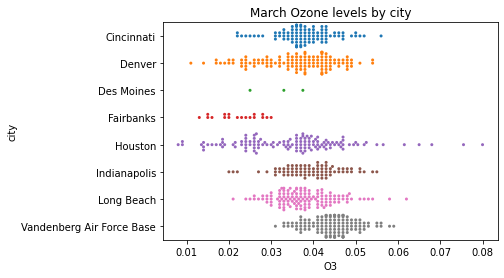

In [6]:
# Filter data to just March
pollution_mar = pollution[pollution['month'] == 3]

# Plot beeswarm with x as O3
sns.swarmplot(y='city',
              x='O3', 
              data=pollution_mar, 
              # Decrease the size of the points to avoid crowding 
              size=3)

# Give a descriptive title
plt.title('March Ozone levels by city')
plt.show()

## A basic text annotation

On the current scatter plot, you can see a particularly prominent point that contains the largest SO2 value observed for August. This point is Cincinnati on August 11th, 2013; however, you would not be able to learn this information from the plot in its current form. Basic text annotations are great for pointing out interesting outliers and giving a bit more information. Draw the readers attention to this Cincinnati value by adding a basic text annotation that gives a bit of the background about this outlier.

Instructions

1. Filter the data plotted in scatter plot to just August.
2. Draw text annotation at `x = 0.57` and `y = 41` to call out the highest SO2 value.
3. Label annotation with `'Cincinnati had highest observed\nSO2 value on Aug 11, 2013'` (note the line break).
4. Change the font-size to `'large'` for the annotation.

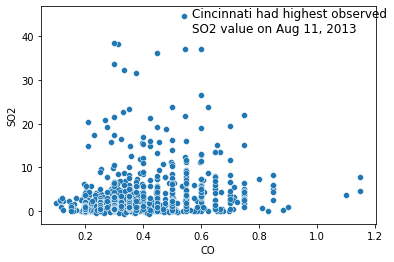

In [7]:
# Draw basic scatter plot of pollution data for August
sns.scatterplot(x='CO', y='SO2', data=pollution[pollution['month'] == 8])

# Label highest SO2 value with text annotation
plt.text(0.57, 41,
         'Cincinnati had highest observed\nSO2 value on Aug 11, 2013',
         # Set the font to large
         fontdict = {'ha': 'left', 'size': 'large'})
plt.show()

## Arrow annotations

Imagine you are a city planner for Long Beach, California. Long Beach is located on the Pacific Ocean and has a large firework show every New Year's Eve. You want to look into whether this show negatively impacts the air quality of the city. To do this, you will look at CO and NO2 levels on New Year's Day. However, it turns out that New Year's Day is _not_ one of the outliers in the plot on the right, it's located in one of the more crowded areas.

To help guide the reader to this point, you'll use an annotation along with an arrow that points to the New Year's Day value. This will provide a nice annotation that explains what the viewer is looking while printing the text in a less crowded region of the plot.

Instructions

1. Grab the row from `jan_pollution` that corresponds to New Year's Day 2012 in the city of Long Beach using the pandas' `.query()` method.
2. Set the endpoint of the arrow (`xy`) by using the `CO` and `NO2` column values from the `lb_newyears` DataFrame.
3. Use the argument `xytext` to place the annotation arrow's text in the bottom left corner of the display at x = `2`, y = `15`.
4. `'shrink'` the arrow to `0.03`, so it doesn't occlude the point of interest.

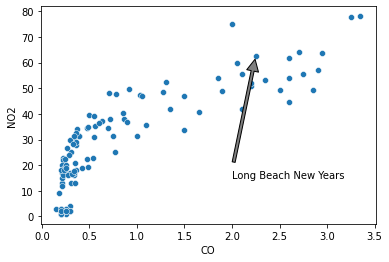

In [9]:
# Query and filter to New Years in Long Beach
jan_pollution = pollution.query("(month == 1) & (year == 2012)")
lb_newyears = jan_pollution.query("(city == 'Long Beach') & (day == 1)")

sns.scatterplot(x='CO', y='NO2',
                data=jan_pollution)

# Point arrow to lb_newyears & place text in lower left 
plt.annotate('Long Beach New Years',
             xy=(lb_newyears['CO'], lb_newyears['NO2']),
             xytext=(2, 15), 
             # Shrink the arrow to avoid occlusion
             arrowprops={'facecolor':'gray', 'width': 3, 'shrink': 0.03},
             backgroundcolor='white')
plt.show()

## Combining annotations and color

You believe that Long Beach, California has a smog problem. Using the pollution data, you'll attempt to make a point for increasing smog reduction regulations using your data visualization wizardry. Specifically, you want to focus on the relationship of CO to O3 levels during 2014 at a city council meeting.

To emphasize how Long Beach compares to a set of peer cities, you've decided to highlight Long Beach and draw attention to a particularly bad day where the CO level was `1.6` and O3 was `0.072` using an annotation.

Instructions

1. Using a list comprehension, make a vector of colors for each point with `'orangered'` if the point belongs to Long Beach, and `'lightgray'` if it doesn't.
2. Use the `is_lb` vector to provide custom colors for each point using the _additional_ keyword argument `facecolors` in the `scatter_kws argument`.
3. In the same `scatter_kws` dictionary, set the opacity to `0.3`.
4. Add an annotation at `x = 1.6` and `y = 0.072` using the text `'April 30th, Bad Day'` to draw attention to a specific point in the data.

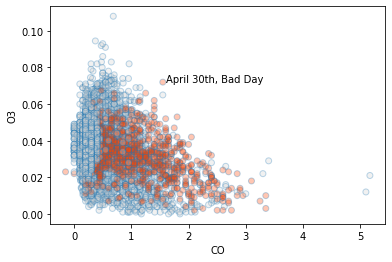

In [14]:
# Make a vector where Long Beach is orangered; else lightgray
is_lb = ['orangered' if city == 'Long Beach' else 'lightgray' for city in pollution['city']]

# Map facecolors to the list is_lb and set alpha to 0.3
sns.regplot(x='CO',
            y='O3',
            data=pollution,
            fit_reg=False, 
            scatter_kws = {'facecolors':is_lb, 'alpha':0.3})

# Add annotation to plot
plt.text(1.6, 0.072, 'April 30th, Bad Day')
plt.show()